PHYS427 HW3 Haoyuan Chen 

In [159]:
#Import necessary librarys
import uproot
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [160]:
#define a function that plot histogram 
def plothist(data,bins,title,xlabel,ylabel):
    plt.hist(data,bins)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);

#define a function that calculate the 2d decay length
def Lt(tree, Lx, Ly):
    L_t = np.sqrt(tree[Lx]**2 + tree[Ly]**2)
    return L_t;

#define a function that calculate the 3d decay length
def L3d(tree, Lx, Ly, Lz):
    L_3d = np.sqrt(tree[Lx]**2 + tree[Ly]**2 + tree[Lz]**2)
    return L_3d;

#define a function that filter the LLP data
def IsLLP(tree, target):
    LLP = tree.loc[tree['IsLLP'] == True]
    T = LLP[target]
    return T;

#define a function that filter the NLLP data
def NotLLP(tree, target):
    NLLP = tree.loc[tree["IsLLP"] == False]
    T = NLLP[target]
    return T;

#define a function that plot histogram
def plotviolin(dataset, title, ylimit):
    plt.figure(figsize= (20,10))
    violin = sns.violinplot(data = dataset)
    violin.set_title(title)
    violin.set_xticklabels(['tree1', 'tree2', 'tree3', 'tree4', 'tree5', 'tree6'])
    if ylimit != None:
        violin.set(ylim=(0,ylimit));

In [161]:
#uproot the root file,load it into a pandas dataframe,and get access to the name of the tree
file1 = uproot.open("./llpfiles/df_1.root")
file1.keys()

[b'pandas_tree218;1']

In [162]:
#load the tree file into pandas dataframe
tree1 = file1["pandas_tree218"].pandas.df()
tree1

,RunNumber,EventNumber,JetPt,JetEta,JetPhi,IsLLP,nLLPs_Near_Jets,Lx,Ly,Lz,...,EH_CVL2,EH_TGL0,EH_TGL1,EH_TGL2,EH_EBL0,EH_EBL1,EH_EBL2,FC_L0,FC_L1,FC_L2
entry,,,,,,,,,,,,,,,,,,,,,
0,284500.0,2041602.0,50.151355,1.767030,0.074290,True,1,1851.684326,178.223892,5354.035156,...,0.000000,0.000000,0.000000,0.000000,0.019344,0.000731,0.000000,0.0,0.0,0.0
1,284500.0,2041537.0,45.315016,1.088594,0.364831,False,0,0.000000,0.000000,0.000000,...,-0.000409,0.007784,-0.000218,0.174103,0.006951,0.000300,0.000130,0.0,0.0,0.0
2,284500.0,2159562.0,163.244844,1.709549,2.769850,True,1,609.158691,239.010056,1741.357788,...,0.000000,0.000000,0.000000,0.000000,0.004981,-0.000061,0.000000,0.0,0.0,0.0
3,284500.0,2159562.0,147.121187,-0.237002,-0.393413,False,0,0.000000,0.000000,0.000000,...,-0.000283,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,284500.0,2159739.0,54.661199,-0.730161,-2.550338,False,0,0.000000,0.000000,0.000000,...,0.010581,0.000009,-0.000370,-0.002349,0.000000,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22571,284500.0,2155029.0,76.296273,1.114254,-1.709045,True,1,259.214996,2172.912354,3113.421875,...,0.000097,0.003310,-0.000572,0.520124,0.112565,0.300919,0.028937,0.0,0.0,0.0
22572,284500.0,2041233.0,53.958059,0.729737,2.172977,True,1,499.816559,714.238342,664.080627,...,0.035989,0.000156,0.000345,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
22573,284500.0,2041233.0,44.355902,-1.914020,-1.443047,False,0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


JetXXX refers to the kinematic properties of jets, where:
Pt corresponds to the component of momentum in the transverse plane.
Phi corresponds to the azimuthal angle.
Eta corresponds to pseudo-rapidity, which is defined by minus the natural log of the tangent of one-half of the center-of-mass scattering angle, theta-cm.

IsLLP is true if there is a long lived particle.

Lx,Ly,Lz corresponds to the LLP's decay length in xyz cordinates.

Other columns corresponds to the energy deposited in different layers of the detector.

(0, 200)

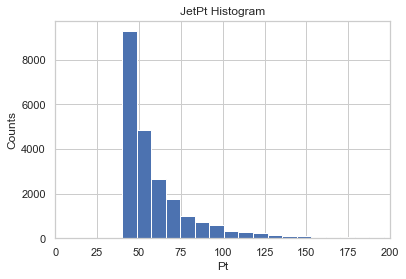

In [163]:
#following cells of code plot the histogram for different variables in tree1
data1 = tree1["JetPt"]
plothist(data1, 100, "JetPt Histogram", "Pt", "Counts")
plt.xlim(0, 200)

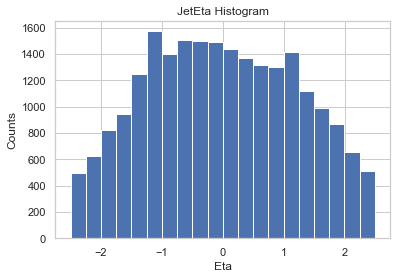

In [164]:
data2 = tree1["JetEta"]
plothist(data2,20,'JetEta Histogram', "Eta", "Counts")

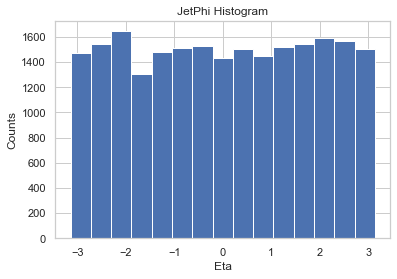

In [165]:
data3 = tree1["JetPhi"]
plothist(data3,15,"JetPhi Histogram", "Eta", "Counts")

(0, 5000)

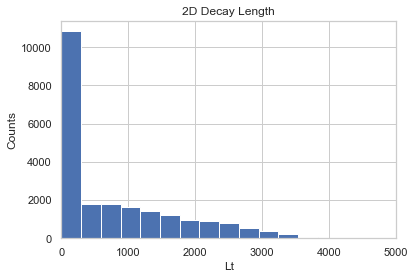

In [170]:
data4 = Lt(tree1,"Lx","Ly")
plothist(data4,90,"2D Decay Length","Lt","Counts")
plt.xlim(0,5000)

(-1000, 4000)

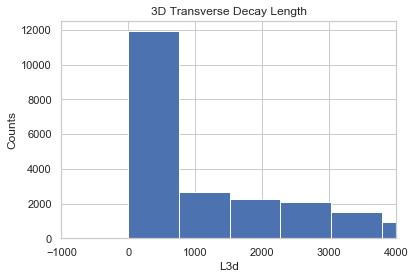

In [171]:
data5 = L3d(tree1,"Lx","Ly","Lz")
plothist(data5,50,"3D Transverse Decay Length", "L3d", "Counts")
plt.xlim(-1000,4000)

In [ ]:
#Following cells of code get access to the name of target trees

In [9]:
file2 = uproot.open("./llpfiles/df_2.root")
file2.keys()

[b'pandas_tree51358;3', b'pandas_tree51358;2']

In [10]:
file3 = uproot.open("./llpfiles/df_3.root")
file3.keys()

[b'pandas_tree53278;2', b'pandas_tree53278;1']

In [11]:
file4 = uproot.open("./llpfiles/df_4.root")
file4.keys()

[b'pandas_tree52558;2', b'pandas_tree52558;1']

In [12]:
file5 = uproot.open("./llpfiles/df_5.root")
file5.keys()

[b'pandas_tree53038;2', b'pandas_tree53038;1']

In [13]:
file6 = uproot.open("./llpfiles/df_6.root")
file6.keys()

[b'pandas_tree54718;7', b'pandas_tree54718;6']

In [14]:
#load root files into pandas dataframe respectively
tree2 = file2["pandas_tree51358"].pandas.df()
tree3 = file3["pandas_tree53278"].pandas.df()
tree4 = file4["pandas_tree52558"].pandas.df()
tree5 = file5["pandas_tree53038"].pandas.df()
tree6 = file6["pandas_tree54718"].pandas.df()

In [56]:
#merge the data into one dataframe
combined_data = [tree1,tree2,tree3,tree4,tree5,tree6]
combined_tree = pd.concat(combined_data, sort = False, keys=['tree1', 'tree2', 'tree3', 'tree4', 'tree5', 'tree6'])
combined_tree

RunNumber  EventNumber       JetPt    JetEta    JetPhi  IsLLP  \
      entry                                                                    
tree1 0         284500.0    2041602.0   50.151355  1.767030  0.074290   True   
      1         284500.0    2041537.0   45.315016  1.088594  0.364831  False   
      2         284500.0    2159562.0  163.244844  1.709549  2.769850   True   
      3         284500.0    2159562.0  147.121187 -0.237002 -0.393413  False   
      4         284500.0    2159739.0   54.661199 -0.730161 -2.550338  False   
...                  ...          ...         ...       ...       ...    ...   
tree6 1695822   310000.0    2628963.0  216.514703  0.155385  2.572538   True   
      1695823   310000.0    2628963.0  100.025234  0.468585  0.328753  False   
      1695824   310000.0    2628963.0   88.622664  1.336524 -0.449329  False   
      1695825   310000.0    2628963.0   79.377008  0.741856 -0.320374  False   
      1695826   310000.0    2628963.0   63.754262  1.006141 -2.172019  False   

               nLLPs_Near_Jets           Lx           Ly           Lz  ...  \
      entry                                                            ...   
tree1 0                      1  1851.684326   178.223892  5354.035156  ...   
      1                      0     0.000000     0.000000     0.000000  ...   
      2                      1   609.158691   239.010056  1741.357788  ...   
      3                      0     0.000000     0.000000     0.000000  ...   
      4                      0     0.000000     0.000000     0.000000  ...   
...                        ...          ...          ...          ...  ...   
tree6 1695822                1  2221.168945  1310.453613   443.914246  ...   
      1695823                0     0.000000     0.000000     0.000000  ...   
      1695824                0     0.000000     0.000000     0.000000  ...   
      1695825                0     0.000000     0.000000     0.000000  ...   
      1695826                0     0.000000     0.000000     0.000000  ...   

                EH_TGL1   EH_TGL2   EH_EBL0   EH_EBL1  EH_EBL2  FC_L0  FC_L1  \
      entry                                                                    
tree1 0        0.000000  0.000000  0.019344  0.000731  0.00000    0.0    0.0   
      1       -0.000218  0.174103  0.006951  0.000300  0.00013    0.0    0.0   
      2        0.000000  0.000000  0.004981 -0.000061  0.00000    0.0    0.0   
      3        0.000000  0.000000  0.000000  0.000000  0.00000    0.0    0.0   
      4       -0.000370 -0.002349  0.000000  0.000000  0.00000    0.0    0.0   
...                 ...       ...       ...       ...      ...    ...    ...   
tree6 1695822  0.000000  0.000000  0.000000  0.000000  0.00000    0.0    0.0   
      1695823  0.000000  0.000000  0.000000  0.000000  0.00000    0.0    0.0   
      1695824  0.000000  0.045422  0.104669  0.001416  0.00000    0.0    0.0   
      1695825  0.000000  0.000000  0.000000  0.000000  0.00000    0.0    0.0   
      1695826  0.000000  0.000000  0.000000  0.000000  0.00000    0.0    0.0   

               FC_L2            Lpt           Lpz  
      entry                                        
tree1 0          0.0            NaN           NaN  
      1          0.0            NaN           NaN  
      2          0.0            NaN           NaN  
      3          0.0            NaN           NaN  
      4          0.0            NaN           NaN  
...              ...            ...           ...  
tree6 1695822    0.0  145729.990106  25084.673828  
      1695823    0.0       0.000000      0.000000  
      1695824    0.0       0.000000      0.000000  
      1695825    0.0       0.000000      0.000000  
      1695826    0.0       0.000000      0.000000  

[3448258 rows x 38 columns]

In [63]:
#get JetPt from different trees, I think I should make use of the merged data but dont know how
JetPt1 = tree1["JetPt"]
JetPt2 = tree2["JetPt"]
JetPt3 = tree3["JetPt"]
JetPt4 = tree4["JetPt"]
JetPt5 = tree5["JetPt"]
JetPt6 = tree6["JetPt"]

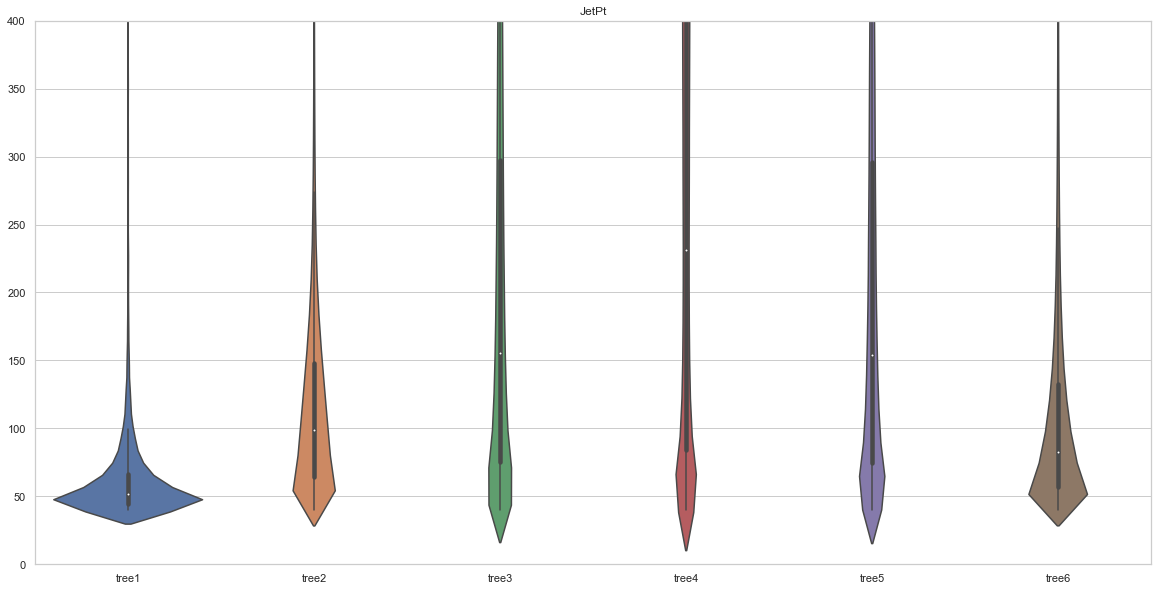

In [113]:
JetPt = plotviolin(dataset = [JetPt1, JetPt2, JetPt3, JetPt4, JetPt5, JetPt6],title = "JetPt", ylimit = 400)

In [81]:
L_t1 = Lt(tree1, "Lx", "Ly")
L_t2 = Lt(tree2, "Lx", "Ly")
L_t3 = Lt(tree3, "Lx", "Ly")
L_t4 = Lt(tree4, "Lx", "Ly")
L_t5 = Lt(tree5, "Lx", "Ly")
L_t6 = Lt(tree6, "Lx", "Ly")

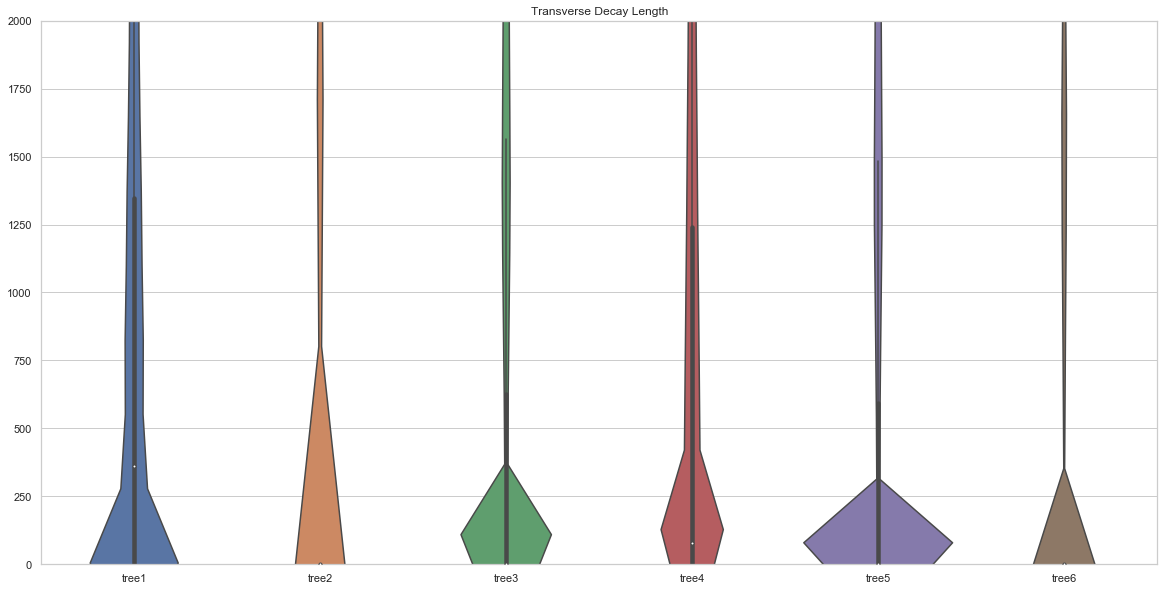

In [115]:
L_t = plotviolin(dataset = [L_t1, L_t2, L_t3, L_t4, L_t5, L_t6], title = "Transverse Decay Length", ylimit = 2000)

In [85]:
L_3d1 = L3d(tree1, "Lx", "Ly", "Lz")
L_3d2 = L3d(tree2, "Lx", "Ly", "Lz")
L_3d3 = L3d(tree3, "Lx", "Ly", "Lz")
L_3d4 = L3d(tree4, "Lx", "Ly", "Lz")
L_3d5 = L3d(tree5, "Lx", "Ly", "Lz")
L_3d6 = L3d(tree6, "Lx", "Ly", "Lz")

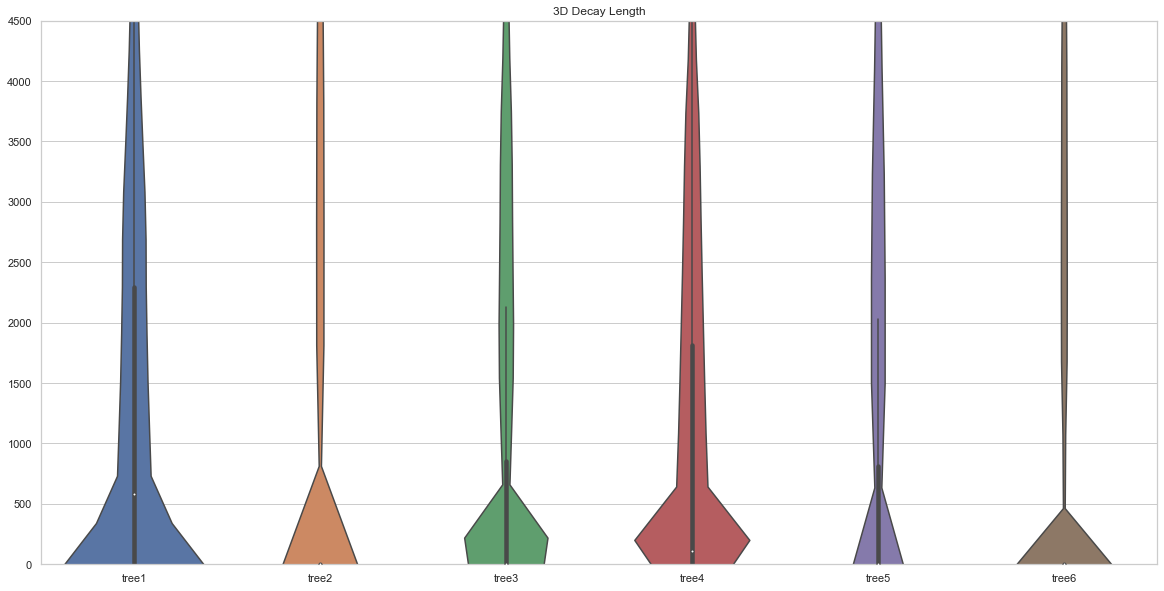

In [119]:
L_3d = plotviolin(dataset = [L_3d1, L_3d2, L_3d3, L_3d4, L_3d5, L_3d6], title = "3D Decay Length", ylimit = 4500)

In [132]:
#divide the data into two groups depends on if it is LLP
JtPtLLP1 = IsLLP(tree1, "JetPt")
JtPtLLP2 = IsLLP(tree2, "JetPt")
JtPtLLP3 = IsLLP(tree3, "JetPt")
JtPtLLP4 = IsLLP(tree4, "JetPt")
JtPtLLP5 = IsLLP(tree5, "JetPt")
JtPtLLP6 = IsLLP(tree6, "JetPt")

JtPtNLLP1 = NotLLP(tree1,"JetPt")
JtPtNLLP2 = NotLLP(tree2,"JetPt")
JtPtNLLP3 = NotLLP(tree3,"JetPt")
JtPtNLLP4 = NotLLP(tree4,"JetPt")
JtPtNLLP5 = NotLLP(tree5,"JetPt")
JtPtNLLP6 = NotLLP(tree6,"JetPt")

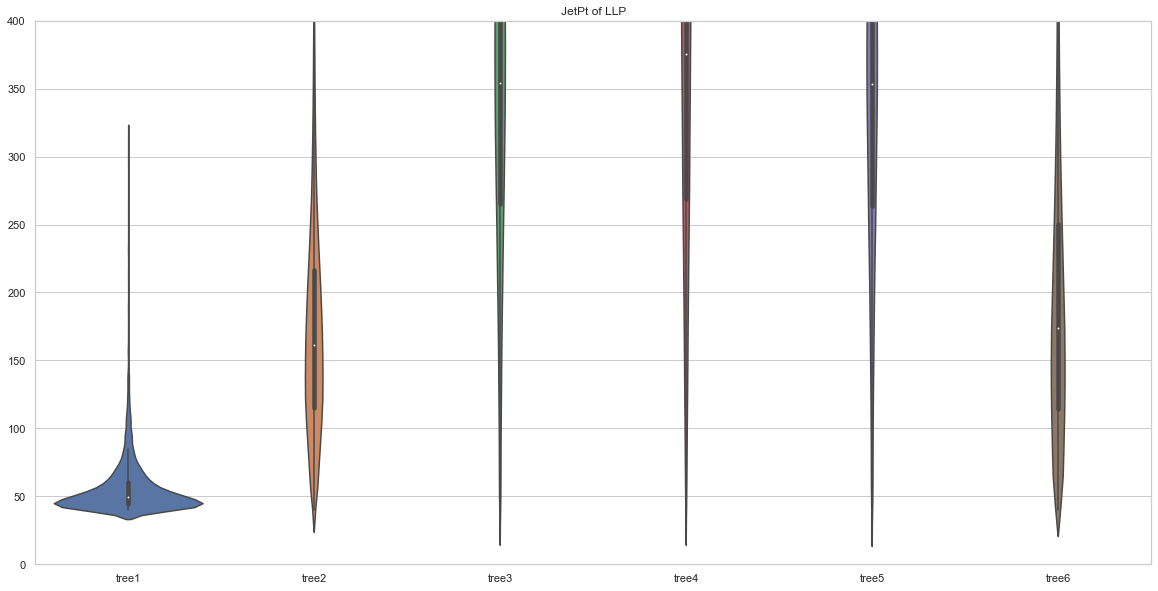

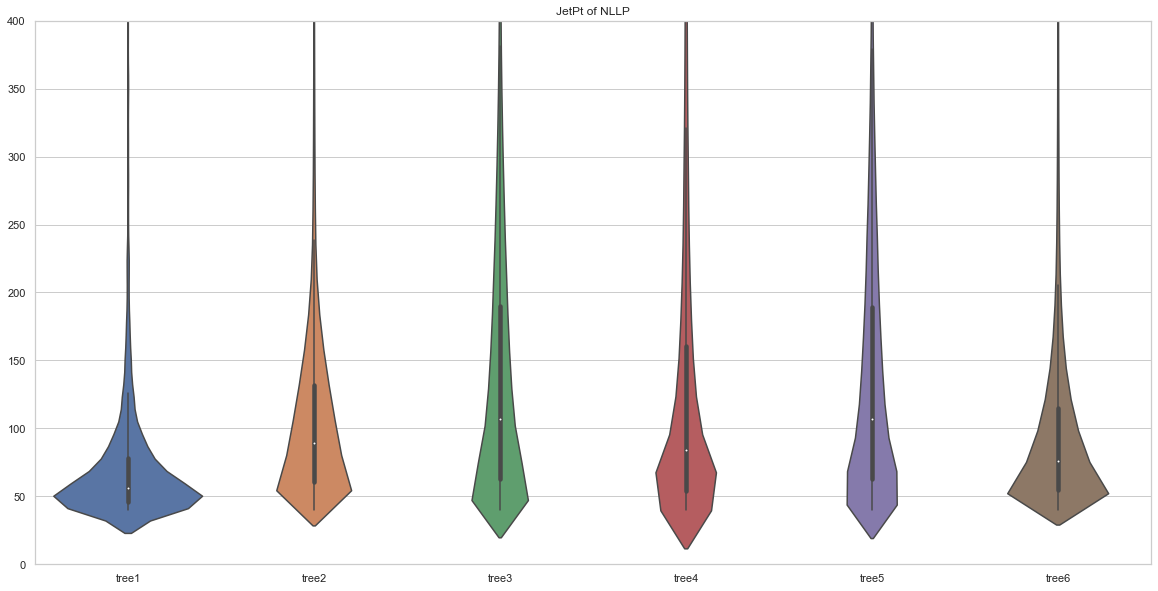

In [137]:
plotviolin(dataset = [JtPtLLP1,JtPtLLP2,JtPtLLP3,JtPtLLP4,JtPtLLP5,JtPtLLP6], title = "JetPt of LLP", ylimit= 400)
plotviolin(dataset = [JtPtNLLP1,JtPtNLLP2,JtPtNLLP3,JtPtNLLP4,JtPtNLLP5,JtPtNLLP6], title = "JetPt of NLLP", ylimit= 400)